In [4]:
pip install quantstats

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     --------------------- ---------------- 524.3/948.2 kB 4.2 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.8 MB 4.2 MB/s eta 0:00:01
   ---------- ----------------------------- 1.0/3.8 MB 3.0 MB/s eta 0:00:01
   ----------------

In [5]:
pip install pyportfolioopt

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------------------- -------------------- 0.5/1.1 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/736.4 kB ? eta -:--:--
   ---------------------------- ----------- 524.3/736.4 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 736.4/736.4 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.4 MB 5.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/8.4 MB 3.0 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.4 MB 2.6 MB/s eta 0:00:03
   --------- ------------------------------ 2.1/8.4 MB 2.6 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.4 MB 2.6 MB/s eta 0:00:03
   -------------- ------------------------- 3.1/8.4 MB 2.5 MB/s eta 0:00:03
   ----------------- --

In [6]:
pip install ta

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29421 sha256=024a9b3aa2e1ccc8e2f94f734aeb87293acad6c01e393801fb4a5269c8d59be8
  Stored in directory: c:\users\yoan rifqi\appdata\local\pip\cache\wheels\a1\d7\29\7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel
import quantstats as qs
import ta
import datetime as dt

In [29]:
# Data Benchmark (IHSG Indonesia)
benchmark = qs.utils.download_returns('^JKSE')

In [76]:
# Data Saham ADRO
adro_1 = qs.utils.download_returns('ADRO.JK')

In [49]:
benchmark.dropna()

Date
1990-04-09   -0.012143
1990-04-10   -0.002204
1990-04-11    0.004124
1990-04-12    0.007753
1990-04-16    0.000625
                ...   
2024-12-24   -0.004326
2024-12-27   -0.004129
2024-12-30    0.006158
2025-01-02    0.011766
2025-01-03    0.000171
Name: Close, Length: 8469, dtype: float64

In [54]:
adro_1.dropna()

Date
2008-07-17   -0.017341
2008-07-18   -0.035294
2008-07-21    0.024390
2008-07-22   -0.005952
2008-07-23   -0.005988
                ...   
2024-12-24   -0.011811
2024-12-27    0.011952
2024-12-30   -0.001299
2025-01-02    0.041152
2025-01-03   -0.027668
Name: Close, Length: 4055, dtype: float64

In [65]:
qs.stats.sharpe(adro_1)

0.47401046593949453

In [72]:
adro_1 = adro_1.pct_change().dropna()

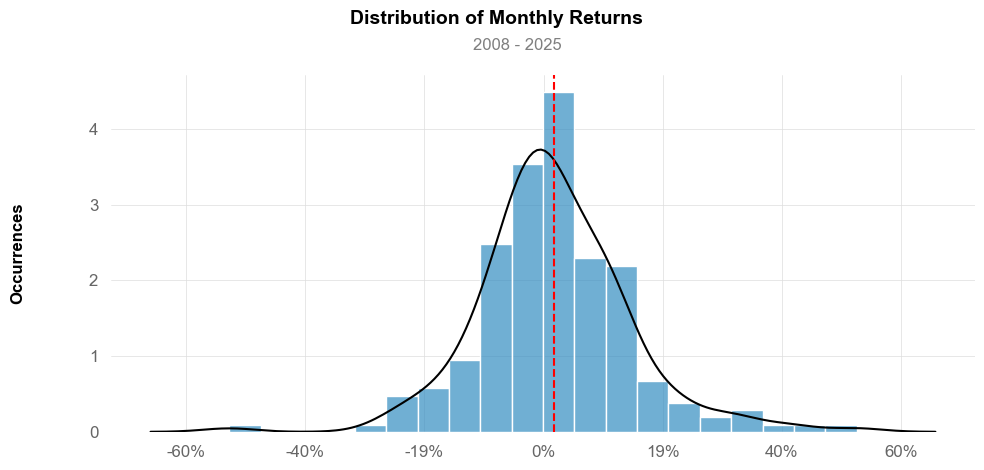

In [85]:
qs.plots.histogram(adro_1)

                           Strategy
-------------------------  ----------
Start Period               2008-07-17
End Period                 2025-01-03
Risk-Free Rate             0.0%
Time in Market             88.0%

Cumulative Return          513.85%
CAGR﹪                     7.9%

Sharpe                     0.47
Prob. Sharpe Ratio         97.19%
Smart Sharpe               0.46
Sortino                    0.71
Smart Sortino              0.69
Sortino/√2                 0.5
Smart Sortino/√2           0.49
Omega                      1.09

Max Drawdown               -82.03%
Longest DD Days            2572
Volatility (ann.)          47.27%
Calmar                     0.1
Skew                       0.34
Kurtosis                   6.51

Expected Daily %           0.04%
Expected Monthly %         0.92%
Expected Yearly %          10.61%
Kelly Criterion            4.13%
Risk of Ruin               0.0%
Daily Value-at-Risk        -4.81%
Expected Shortfall (cVaR)  -4.81%

Max Consecutive Wins       8

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2011-01-05,2016-01-20,2018-01-19,2572,-82.028252,-80.452756
2,2008-07-18,2008-11-24,2009-11-12,483,-72.352945,-71.764705
3,2018-01-30,2020-03-19,2021-12-14,1415,-70.617736,-59.684793
4,2022-10-10,2023-05-31,2024-07-17,647,-41.564432,-39.272844
5,2022-06-08,2022-07-01,2022-08-31,85,-25.479452,-24.383560


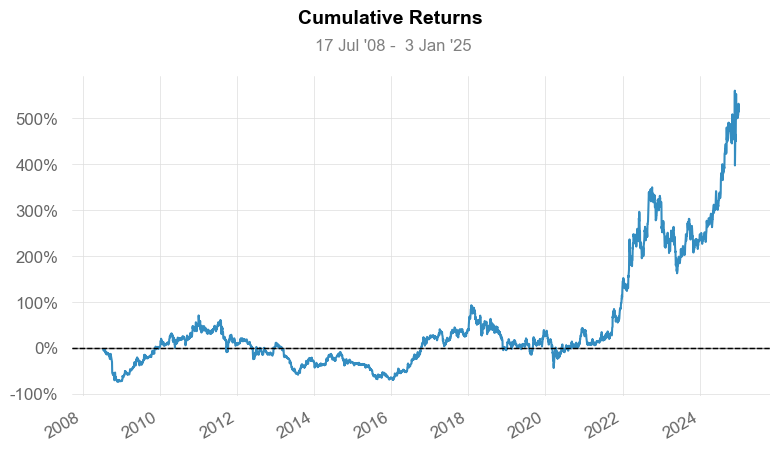

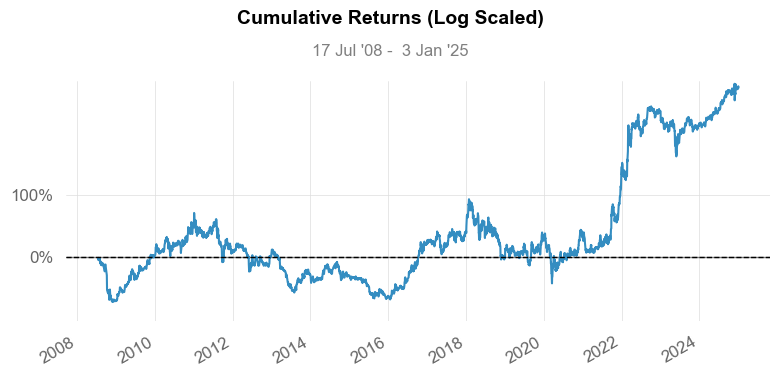

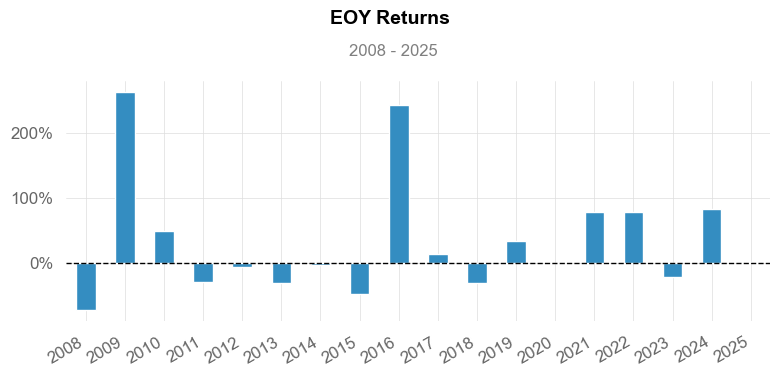

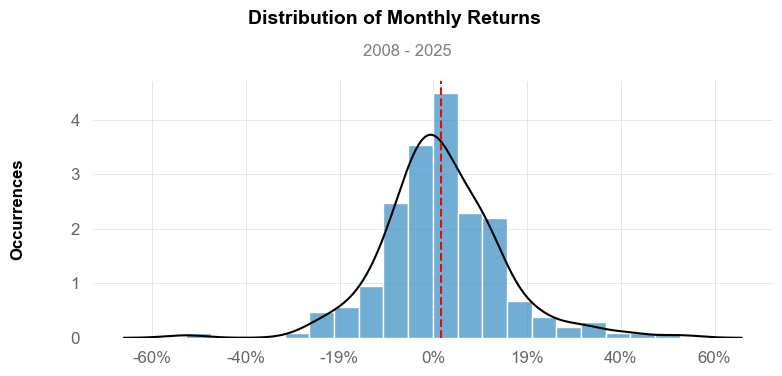

c:\Users\Yoan Rifqi\Downloads\Project Analysis Personal\Dataset Saham Indonesia  Indonesia Stock Dataset\.venv\Lib\site-packages\quantstats\_plotting\core.py:294: FutureWarning:

Passing additional kwargs to DatetimeIndexResampler.sum has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.



UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [88]:
qs.reports.full(adro_1)

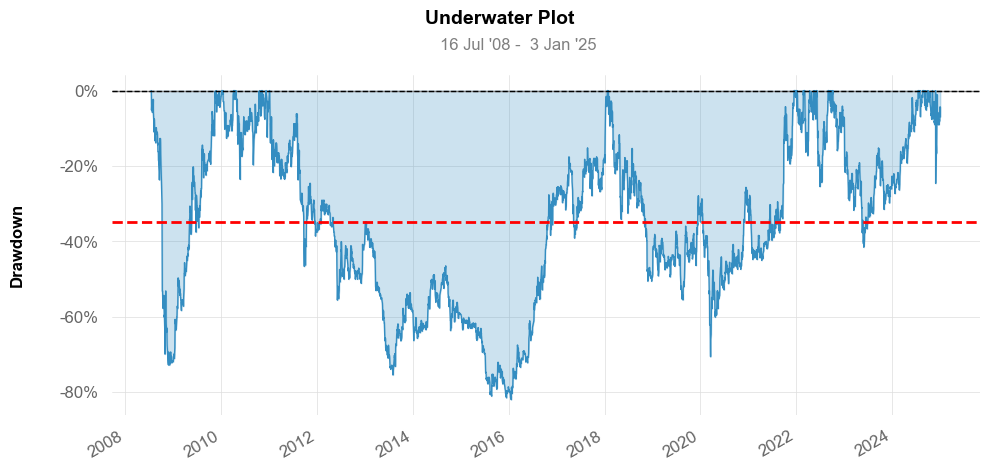

In [78]:
qs.plots.drawdown(adro_1)

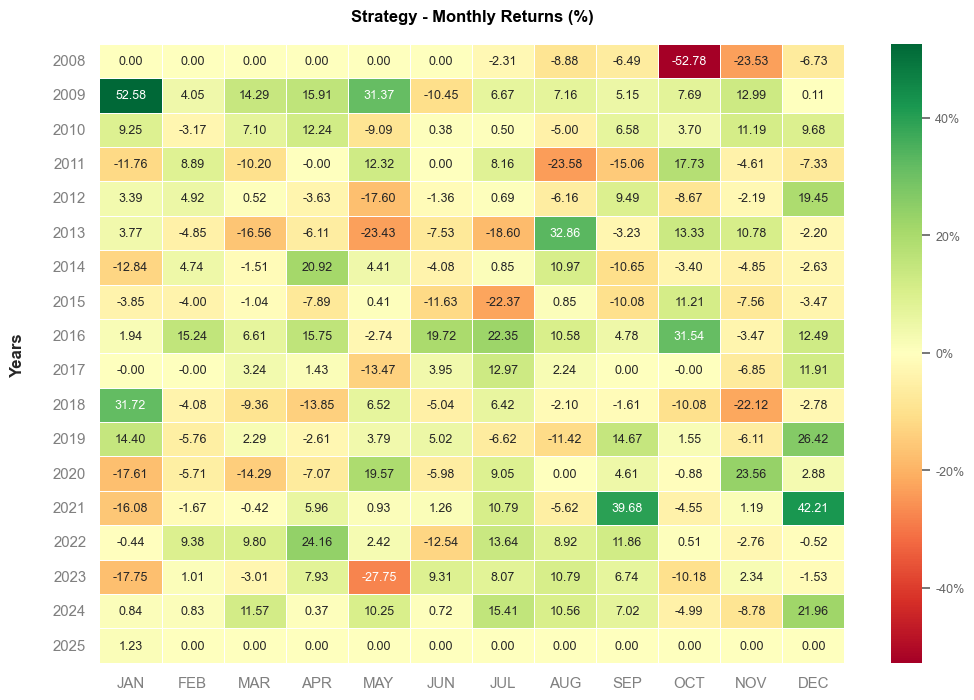

In [83]:
qs.plots.monthly_returns(adro_1)

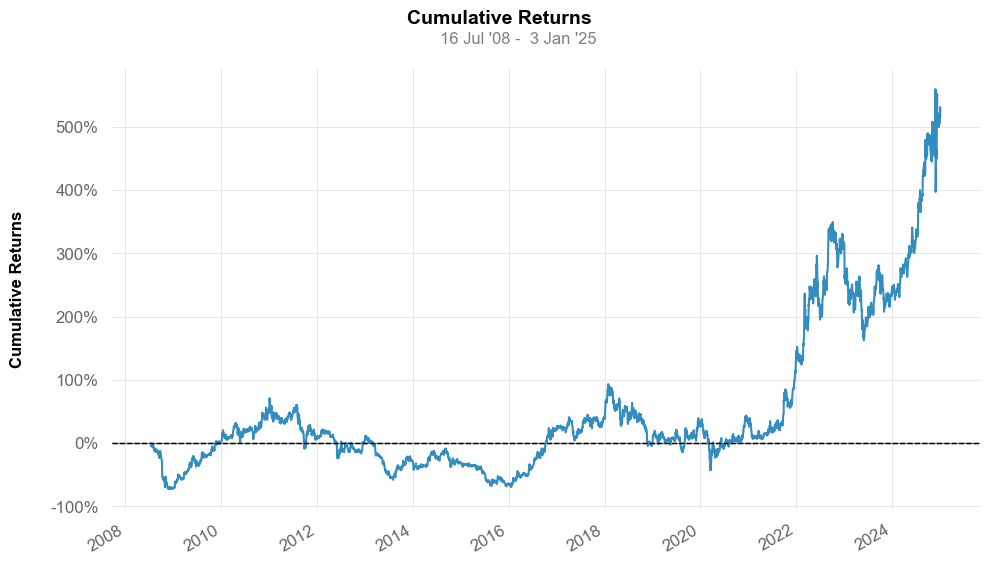

In [77]:
qs.plots.returns(adro_1)

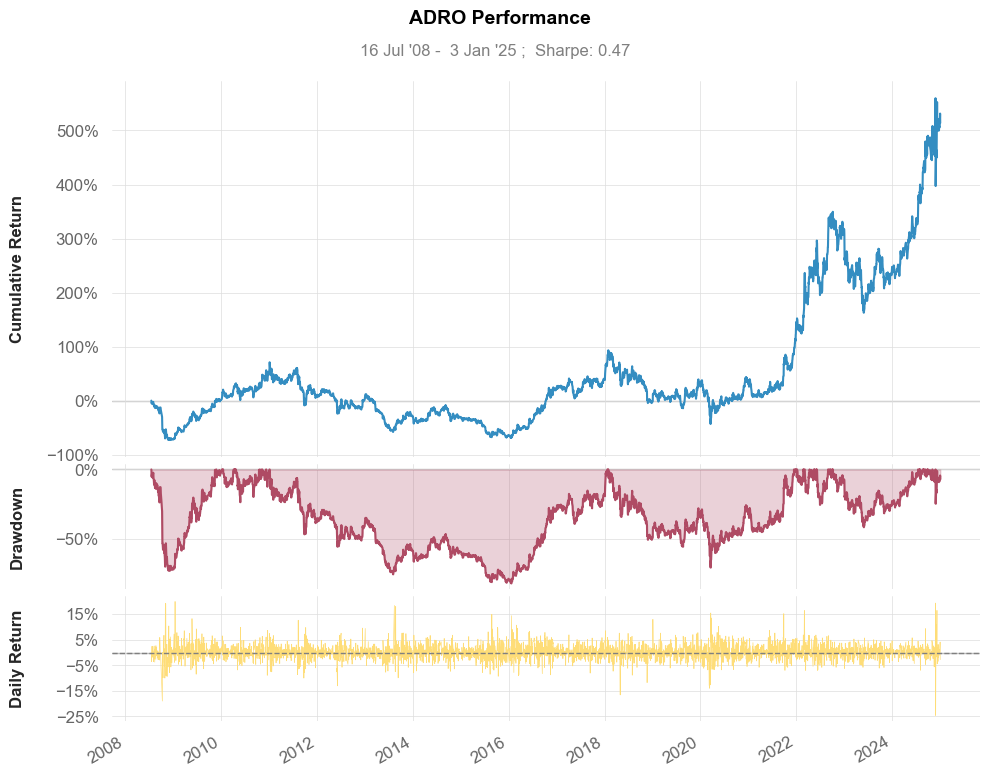

In [69]:
qs.plots.snapshot(adro_1, title='ADRO Performance', show=True)

In [64]:
qs.plots.daily_returns(adro_1)

TypeError: daily_returns() missing 1 required positional argument: 'benchmark'